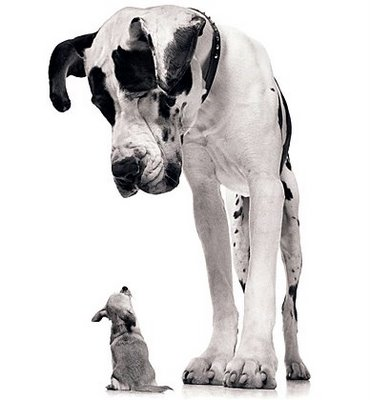

# Feature Scaling

## Motivation

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
Which of the following observations are more similar?<br>
</p></div>

<table>
<tr>
    <th>
    Age
    </th>
    <th>
    Years of Experience
    </th>
    <th>
    Salary
    </th>
</tr>
<tr>
    <td>
    30
    </td>
    <td>
    7
    </td>
    <td>
    30,000
    </td>
</tr>
<tr>
    <td>
    33
    </td>
    <td>
    8
    </td>
    <td>
    27,000
    </td>
</tr>
<tr>
    <td>
    55
    </td>
    <td>
    20
    </td>
    <td>
    26,000
    </td>
</tr>
</table>

<p style="line-height:1.75;font-size:16px">
In order to measure similarity we must first decide on a similarity metric. A metric that is commonly used is euclidean distance which is defined as:
<center><h3>
$d(a,b)=\sqrt{\sum\limits_{i=1}^{n}(a_i - b_i)^2}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Let's calculate the euclidean distance between all pairs of vectors in our examples using Python:

In [27]:
import pandas as pd

df = pd.read_csv('data/employees.csv')
df

,Age,Experience,Salary
0,30,7,30000
1,33,8,27000
2,55,20,26000


In [37]:
from scipy.spatial import distance

print(f'Distance between row 1 and row 2: {distance.euclidean(df.iloc[0,], df.iloc[1,])}')
print(f'Distance between row 1 and row 3: {distance.euclidean(df.iloc[0,], df.iloc[2,])}')
print(f'Distance between row 2 and row 3: {distance.euclidean(df.iloc[1,], df.iloc[2,])}')

Distance between row 1 and row 2: 3000.0016666662036
Distance between row 1 and row 3: 4000.0992487687104
Distance between row 2 and row 3: 1000.3139507174735


<p style="line-height:1.75;font-size:16px">
According to these results, row 2 and row 3 are the most similar (have the smallest distance) but that doesn't sit well with our intuition and with what we'd like to see. In our case, the salary feature dominated the other features which meant it affected the distance more than the other features. Both the age and experience features were of the same magnitude but the salary had quite a different magnitude.<br>
Since the algorithms we use in ML just see the numbers and have no idea about the different scales and meaning of the various features, they treat them the same. Usually that's not what we'd like to see so we need to pre-process the data in such a way that the magnitude isn't an issue - that's where feature scaling comes in.

## Definition

<p style="line-height:1.75;font-size:16px">
According to Wikipedia, feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

## Types of Scaling

### Min-Max Scaler

<p style="line-height:1.75;font-size:16px">
Min-Max normalization is the simplest method and consists of rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as:
<center><h3>
$x_{scaled}=\frac{x-min(x)}{max(x)-min(x)}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Min-Max normalization preserves the shape of the original distribution and is sensitive to outliers.

In [58]:
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('data/employees.csv')
print('Original Data')
print(data)

scaler = MinMaxScaler()
scaler.fit(data)
data[data.columns] = scaler.transform(data[data.columns])
print('\nScaled Data')
print(data)

Original Data
   Age  Experience  Salary
0   30           7   30000
1   33           8   27000
2   55          20   26000

Scaled Data
    Age  Experience  Salary
0  0.00    0.000000    1.00
1  0.12    0.076923    0.25
2  1.00    1.000000    0.00


### Robust Scaler

<p style="line-height:1.75;font-size:16px">
This scaler is called robust since it is intended to be robust to outliers. It does this by subtracting the median and dividing by the interquartile range (75% value - 25% value).
<center><h3>
$x_{scaled}=\frac{x-Q_2(x)}{Q_3(x)-Q_1(x)}$
</h3>
</center>

<p style="line-height:1.75;font-size:16px">
Unlike min-max scaling, the robust scaler doesn't transform a feature to be between 0 and 1. 

In [59]:
from sklearn.preprocessing import RobustScaler

data = pd.read_csv('data/employees.csv')
print('Original Data')
print(data)

scaler = RobustScaler()
scaler.fit(data)
data[data.columns] = scaler.transform(data[data.columns])
print('\nScaled Data')
print(data)

Original Data
   Age  Experience  Salary
0   30           7   30000
1   33           8   27000
2   55          20   26000

Scaled Data
    Age  Experience  Salary
0 -0.24   -0.153846     1.5
1  0.00    0.000000     0.0
2  1.76    1.846154    -0.5


### Standard Scaler

<p style="line-height:1.75;font-size:16px">
The StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. It results in a distribution with a standard deviation equal and variance equal to 1 with a mean of 0.
<center><h3>
$x_{standardized}=\frac{x-\bar{x}}{\sigma}$
</h3>
</center>

In [60]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data/employees.csv')
print('Original Data')
print(data)

scaler = StandardScaler()
scaler.fit(data)
data[data.columns] = scaler.transform(data[data.columns])
print('\nStandardized Data')
print(data)

Original Data
   Age  Experience  Salary
0   30           7   30000
1   33           8   27000
2   55          20   26000

Standardized Data
        Age  Experience    Salary
0 -0.837408   -0.790066  1.372813
1 -0.568241   -0.620766 -0.392232
2  1.405649    1.410832 -0.980581


## Visualizing Scaling

In [61]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

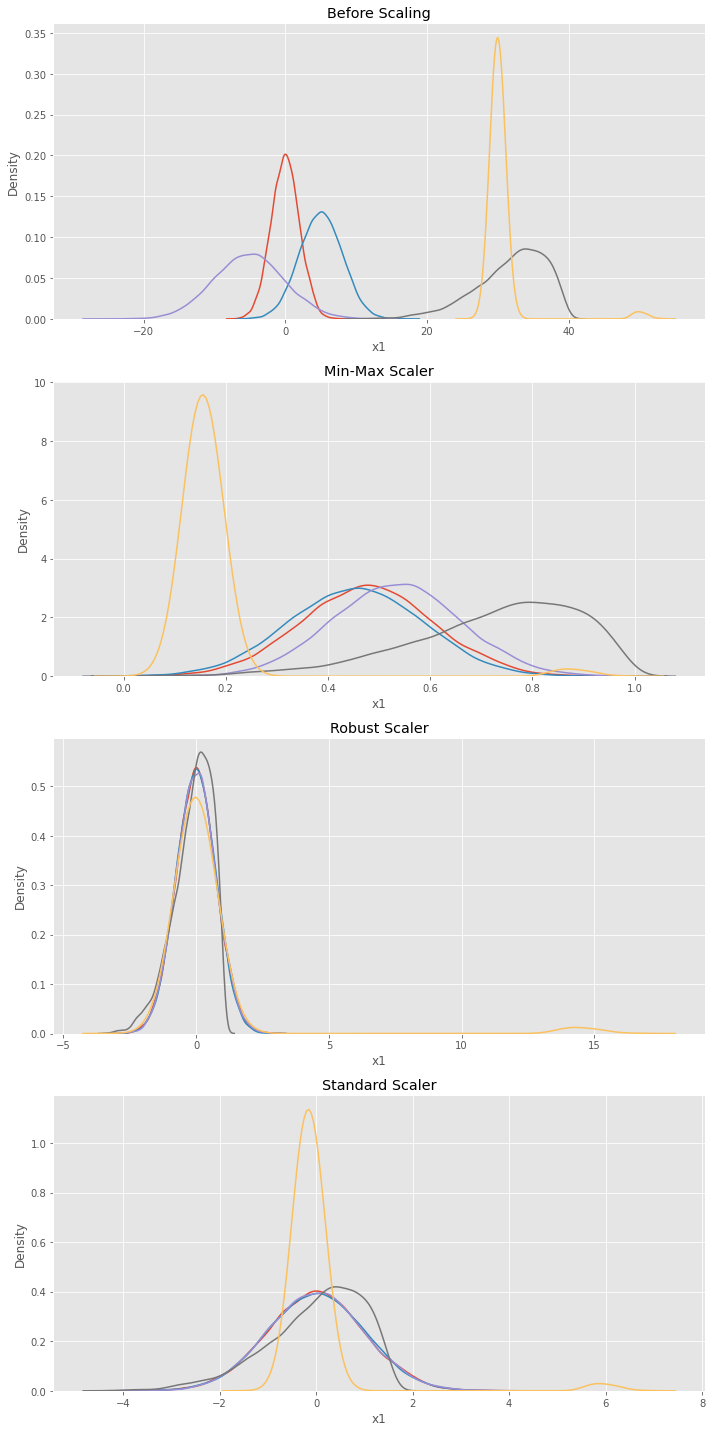

In [75]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000),
    'x4': np.random.beta(8, 2, 10000) * 40,
    'x5': np.concatenate([np.random.normal(30, 1, 9750), np.random.normal(50, 1, 250)])
})

scaler = preprocessing.MinMaxScaler()
min_max_scaler_df = scaler.fit_transform(df)
min_max_scaler_df = pd.DataFrame(min_max_scaler_df, columns=['x1', 'x2', 'x3', 'x4', 'x5'])

scaler = preprocessing.RobustScaler()
robust_scaler_df = scaler.fit_transform(df)
robust_scaler_df = pd.DataFrame(robust_scaler_df, columns=['x1', 'x2', 'x3', 'x4', 'x5'])

scaler = preprocessing.StandardScaler()
standard_scaler_df = scaler.fit_transform(df)
standard_scaler_df = pd.DataFrame(standard_scaler_df, columns=['x1', 'x2', 'x3', 'x4', 'x5'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 20))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
sns.kdeplot(df['x4'], ax=ax1)
sns.kdeplot(df['x5'], ax=ax1)

ax2.set_title('Min-Max Scaler')
sns.kdeplot(min_max_scaler_df['x1'], ax=ax2)
sns.kdeplot(min_max_scaler_df['x2'], ax=ax2)
sns.kdeplot(min_max_scaler_df['x3'], ax=ax2)
sns.kdeplot(min_max_scaler_df['x4'], ax=ax2)
sns.kdeplot(min_max_scaler_df['x5'], ax=ax2)

ax3.set_title('Robust Scaler')
sns.kdeplot(robust_scaler_df['x1'], ax=ax3)
sns.kdeplot(robust_scaler_df['x2'], ax=ax3)
sns.kdeplot(robust_scaler_df['x3'], ax=ax3)
sns.kdeplot(robust_scaler_df['x4'], ax=ax3)
sns.kdeplot(robust_scaler_df['x5'], ax=ax3)

ax4.set_title('Standard Scaler')
sns.kdeplot(standard_scaler_df['x1'], ax=ax4)
sns.kdeplot(standard_scaler_df['x2'], ax=ax4)
sns.kdeplot(standard_scaler_df['x3'], ax=ax4)
sns.kdeplot(standard_scaler_df['x4'], ax=ax4)
sns.kdeplot(standard_scaler_df['x5'], ax=ax4)

plt.tight_layout()
plt.show()

## Applying Scaling to Our Example

In [90]:
import pandas as pd
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

scalers = {
    'Min-Max Scaler': MinMaxScaler,
    'Robust Scaler': RobustScaler,
    'Standard Scaler': StandardScaler
}

for name, scaler in scalers.items():
    data = pd.read_csv('data/employees.csv')
    sc = scaler()
    sc.fit(data)
    data[data.columns] = sc.transform(data[data.columns])
    print(name)
    print(f'Distance between row 1 and row 2: {distance.euclidean(data.iloc[0,], data.iloc[1,])}')
    print(f'Distance between row 1 and row 3: {distance.euclidean(data.iloc[0,], data.iloc[2,])}')
    print(f'Distance between row 2 and row 3: {distance.euclidean(data.iloc[1,], data.iloc[2,])}')
    print('\n')

Min-Max Scaler
Distance between row 1 and row 2: 0.7634246261179382
Distance between row 1 and row 3: 1.7320508075688774
Distance between row 2 and row 3: 1.2996041727838366


Robust Scaler
Distance between row 1 and row 2: 1.5268492522358763
Distance between row 1 and row 3: 3.4641016151377544
Distance between row 2 and row 3: 2.599208345567673


Standard Scaler
Distance between row 1 and row 2: 1.793459740494814
Distance between row 1 and row 3: 3.926030627293482
Distance between row 2 and row 3: 2.893058186898048




##  Choosing When/How to Scale

<p style="line-height:1.75;font-size:16px">
Algorithms which use distance metrics, such as euclidean distance, are sensitive to magnitudes. Performing feature scaling when using those models is therefore important. Examples of algorithms that use distance metrics are:
1. K-Means
2. K Nearest Neighbors
3. PCA
4. SVM
5. Gradient Descent

<p style="line-height:1.75;font-size:16px">
Also, when using regularization such as L2, we would also need to apply feature scaling.<br>
There's no rule-of-thumb when it comes to choosing which scaling to use. If outliers are not an issue then starting with min-max scaling is pretty common. We use the standard scaler when we need our data to be normally distributed. In general, you can try different types of scaling and see what works best on your data.

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Train a KNN regressor on the housing dataset we used earlier to predict the median house value. This time, try to use different scaling methods and see how they affect your results.
</div>

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

housing = pd.read_csv('data/housing.csv')
housing.dropna(inplace=True)
housing = pd.get_dummies(housing)

scalers = {'Min-Max Scaler': MinMaxScaler(), 'Robust Scaler': RobustScaler(), 'Standard Scaler': StandardScaler()}
for name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(housing.drop('median_house_value', axis=1))
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, housing['median_house_value'])
    knn = KNeighborsRegressor(5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    r2_score_val = r2_score(y_pred, y_test)
    print(name)
    print(f'RMSE: {rmse}, R2 Score: {r2_score_val}\n')


Min-Max Scaler
RMSE: 61609.64337853372, R2 Score: 0.6079881000091216

Robust Scaler
RMSE: 61961.491065711954, R2 Score: 0.6064279031104493

Standard Scaler
RMSE: 59945.56958793248, R2 Score: 0.6236874312918048

